# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
weather_api_key

'cdb29755a41896e8d3ed0e60a4cfbfe8'

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 596


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
subset_cities = cities[:10]
subset_cities

['port-aux-francais',
 'kodiak',
 'bilibino',
 'nicoya',
 'waitangi',
 'san patricio',
 'iqaluit',
 'adamstown',
 'mezhdurechensk',
 'tolanaro']

In [5]:
url = "https://api.openweathermap.org/data/2.5/weather"
city_url = url + "?q=" + subset_cities[2] + "&APPID=" + weather_api_key
res = requests.get(city_url)
res

<Response [200]>

In [6]:
res.json

<bound method Response.json of <Response [200]>>

In [7]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "?q=" + city 
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url + "&APPID=" + weather_api_key)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | kodiak
Processing Record 3 of Set 1 | bilibino
Processing Record 4 of Set 1 | nicoya
Processing Record 5 of Set 1 | waitangi
Processing Record 6 of Set 1 | san patricio
Processing Record 7 of Set 1 | iqaluit
Processing Record 8 of Set 1 | adamstown
Processing Record 9 of Set 1 | mezhdurechensk
Processing Record 10 of Set 1 | tolanaro
Processing Record 11 of Set 1 | kenai
Processing Record 12 of Set 1 | korla
Processing Record 13 of Set 1 | constantia
Processing Record 14 of Set 1 | bakanas
Processing Record 15 of Set 1 | bel ombre
Processing Record 16 of Set 1 | newman
Processing Record 17 of Set 1 | tiksi
Processing Record 18 of Set 1 | sosnovo-ozerskoye
Processing Record 19 of Set 1 | invercargill
Processing Record 20 of Set 1 | kruisfontein
Processing Record 21 of Set 1 | sanctuary point
Processing Record 22 of Set 1 | college
Processing Record 

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          566
Lat           566
Lng           566
Max Temp      566
Humidity      566
Cloudiness    566
Wind Speed    566
Country       566
Date          566
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,276.91,96,100,21.45,TF,1718037999
1,kodiak,57.7900,-152.4072,279.88,100,100,7.20,US,1718038135
2,bilibino,68.0546,166.4372,282.55,66,100,1.26,RU,1718038039
3,nicoya,10.1483,-85.4520,303.23,70,86,1.09,CR,1718038285
4,waitangi,-43.9535,-176.5597,283.05,97,100,0.45,NZ,1718037994


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,276.91,96,100,21.45,TF,1718037999
1,kodiak,57.7900,-152.4072,279.88,100,100,7.20,US,1718038135
2,bilibino,68.0546,166.4372,282.55,66,100,1.26,RU,1718038039
3,nicoya,10.1483,-85.4520,303.23,70,86,1.09,CR,1718038285
4,waitangi,-43.9535,-176.5597,283.05,97,100,0.45,NZ,1718037994


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

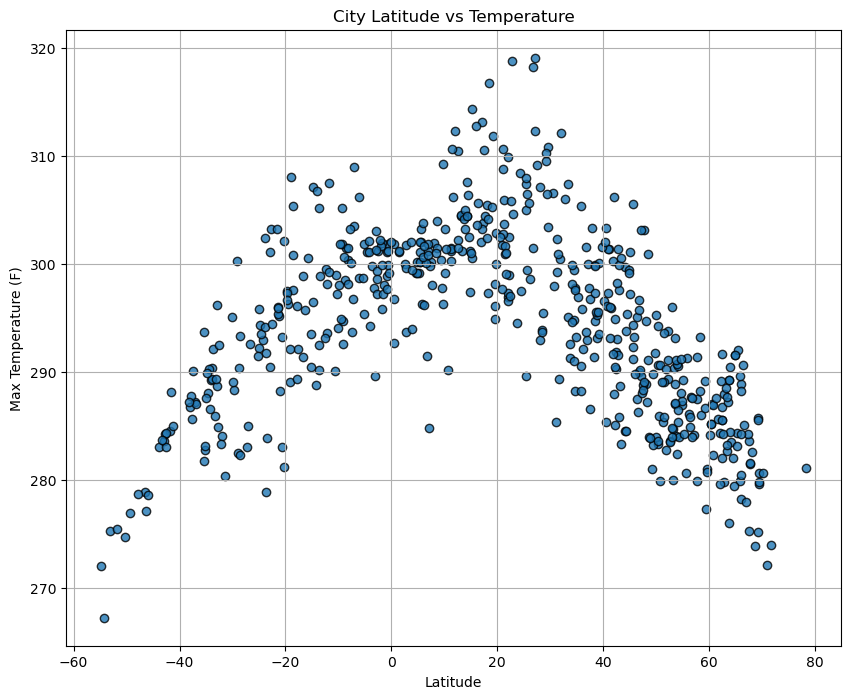

In [12]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
fig1, ax1 = plt.subplots(figsize=(10,8))
plt.scatter(x_values, y_values, alpha = 0.80, edgecolors = "k", linewidths = 1)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title("City Latitude vs Temperature")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

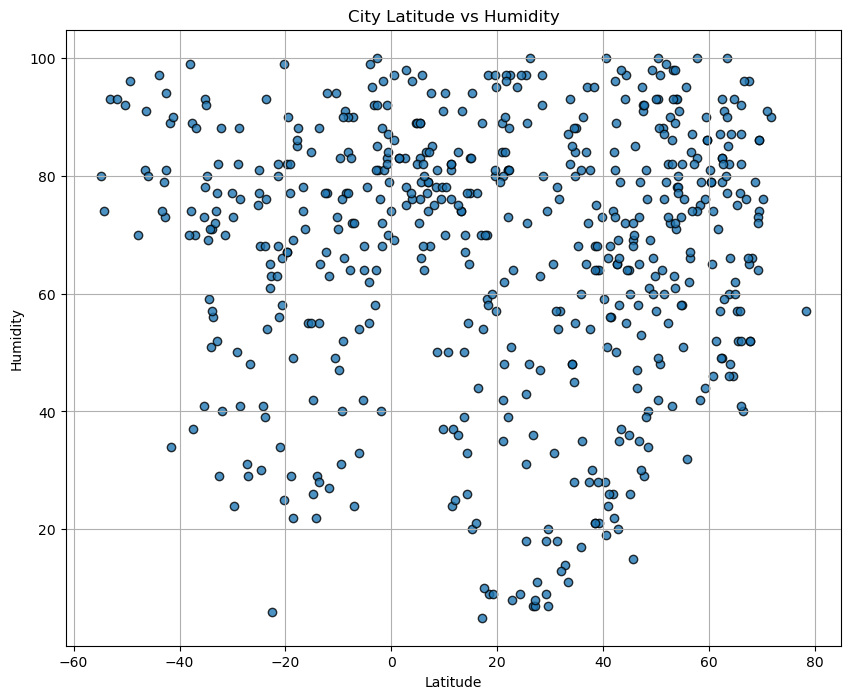

In [13]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
fig1, ax1 = plt.subplots(figsize=(10,8))
plt.scatter(x_values, y_values, alpha = 0.80, edgecolors = "k", linewidths = 1)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("City Latitude vs Humidity")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

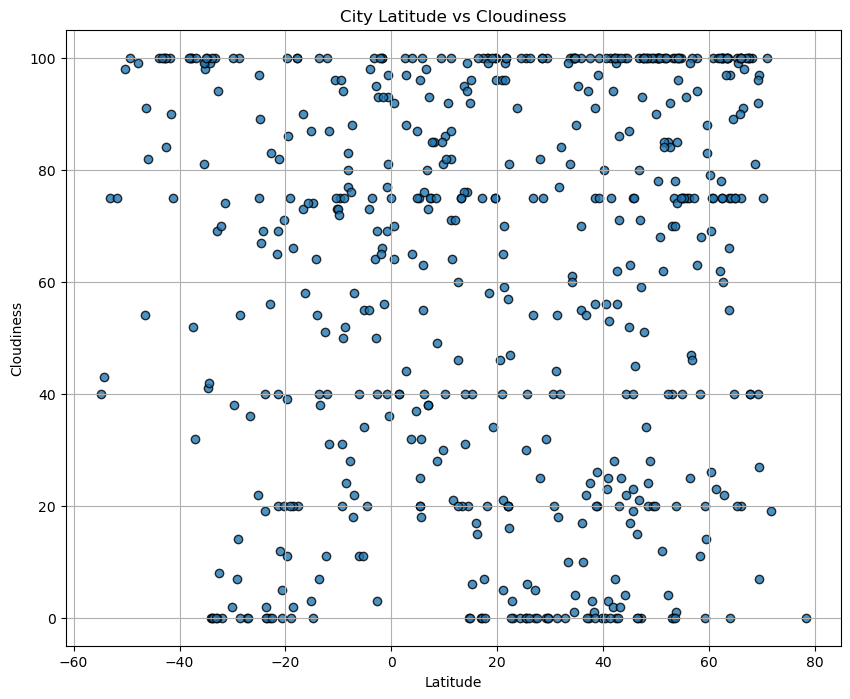

In [14]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
fig1, ax1 = plt.subplots(figsize=(10,8))
plt.scatter(x_values, y_values, alpha = 0.80, edgecolors = "k", linewidths = 1)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title(f'City Latitude vs Cloudiness')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

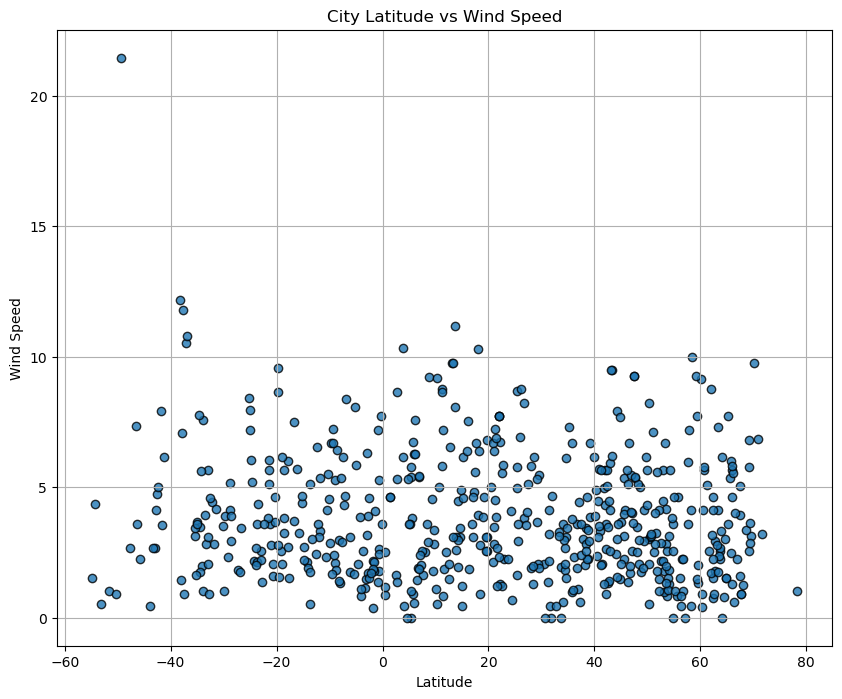

In [15]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
fig1, ax1 = plt.subplots(figsize=(10,8))
plt.scatter(x_values, y_values, alpha = 0.80, edgecolors = "k", linewidths = 1)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title(f'City Latitude vs Wind Speed')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [16]:
# Define a function to create Linear Regression plots
def lineregress(x,y):
    slope, intercept, rvalue, p_value, std_err =linregress(x, y)
    plt.plot(x, [intercept + slope*val for val in x], 'r')
    print(f"The R-squared is: [rvalue]")

In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,kodiak,57.7900,-152.4072,279.88,100,100,7.20,US,1718038135
2,bilibino,68.0546,166.4372,282.55,66,100,1.26,RU,1718038039
3,nicoya,10.1483,-85.4520,303.23,70,86,1.09,CR,1718038285
5,san patricio,28.0170,-97.5169,307.09,47,25,1.92,US,1718038096
6,iqaluit,63.7506,-68.5145,276.00,60,75,2.57,CA,1718037991


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]< 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,276.91,96,100,21.45,TF,1718037999
4,waitangi,-43.9535,-176.5597,283.05,97,100,0.45,NZ,1718037994
7,adamstown,-25.0660,-130.1015,295.81,81,97,7.97,PN,1718038287
9,tolanaro,-25.0319,46.9987,292.19,77,75,7.20,MG,1718038287
14,bel ombre,-4.6167,55.4167,301.06,78,20,2.06,SC,1718038289


###  Temperature vs. Latitude Linear Regression Plot

The R-squared is: [rvalue]


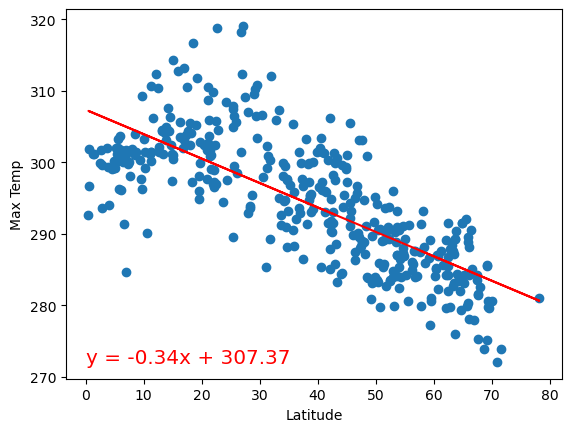

In [22]:
# Linear regression on Northern Hemisphere
lineregress(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
slope, intercept, rvalue, p_value, std_err = linregress(northern_hemi_df['Lat'], northern_hemi_df["Max Temp"])
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
slope = '{0:.2f}'.format(slope)
intercept = '{0:,.2f}'.format(intercept)

plt.text(0,272, s=f"y = {slope}x + {intercept}", c='r', size='x-large')
plt.ylabel("Max Temp")
plt.xlabel("Latitude")
plt.savefig("output_data/north_max_temp.png")
         

The R-squared is: [rvalue]


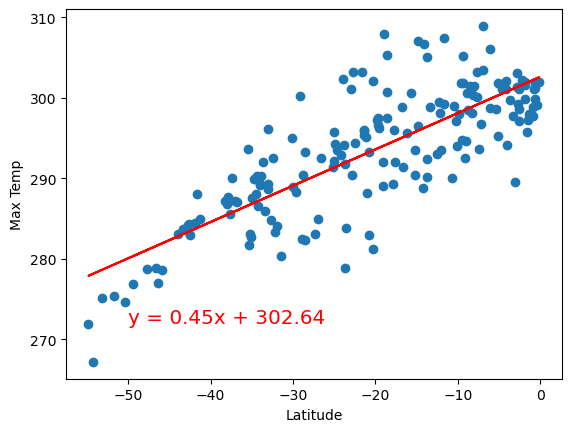

In [24]:
# Linear regression on Southern Hemisphere
lineregress(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])
slope, intercept, rvalue, p_value, std_err =linregress(southern_hemi_df['Lat'], southern_hemi_df["Max Temp"])
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])
slope = '{0:,.2f}'.format(slope)
intercept = '{0:,.2f}'.format(intercept)

plt.text(-50,272, s=f"y = {slope}x + {intercept}", c='r', size='x-large')
plt.ylabel("Max Temp")
plt.xlabel("Latitude")
plt.savefig("output_data/south_max_temp.png")

**Discussion about the linear relationship: ** The Northern Hemisphere has a negative correlation between latitude and max temperature. The temperature tends to decrease, moving towards the north. In the Southern Hemisphere, a positive correlation is moving farther from the south pole (higher x-values), and the max temperature tends to increase. The intercept on the northern and southern hemispheres suggests the expected maximum temperature at the equator (where x = 0).

### Humidity vs. Latitude Linear Regression Plot

The R-squared is: [rvalue]


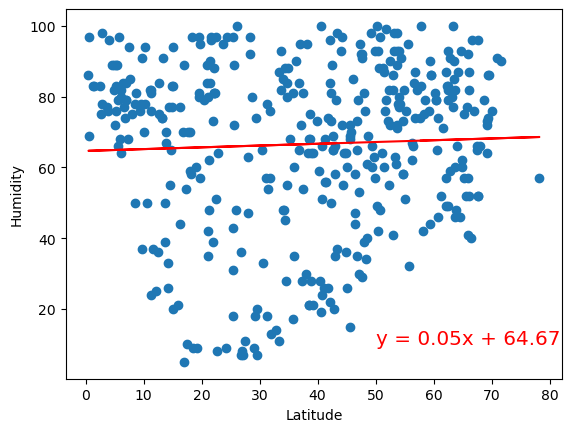

In [31]:
# Northern Hemisphere
lineregress(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])
slope, intercept, rvalue, p_value, std_err =linregress(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])
slope = '{0:,.2f}'.format(slope)
intercept = '{0:,.2f}'.format(intercept)

plt.text(50,10, s=f"y = {slope}x + {intercept}", c='r', size='x-large')
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.savefig("output_data/north_humidity.png")

The R-squared is: [rvalue]


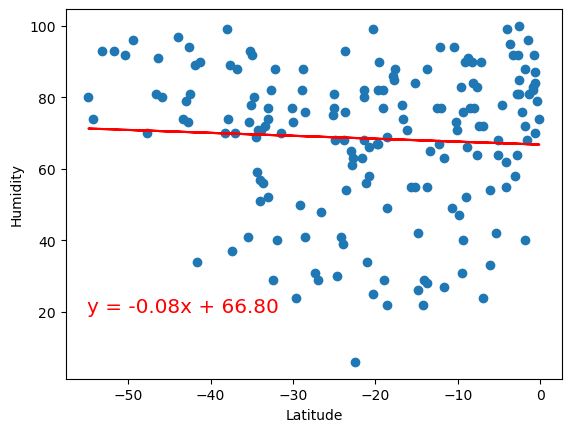

In [32]:
# Southern Hemisphere
lineregress(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])
slope, intercept, rvalue, p_value, std_err =linregress(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])
slope = '{0:,.2f}'.format(slope)
intercept = '{0:,.2f}'.format(intercept)

plt.text(-55,20, s=f"y = {slope}x + {intercept}", c='r', size='x-large')
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.savefig("output_data/south_humidity.png")

**Discussion about the linear relationship:** In the Northern Hemisphere, the positive correlation indicates that there is an overall increasing trend of humidity with increasing latitude. However, given the relatively small slope, this increase is gradual. 
In the Southern Hemisphere, there is a slight negative linear relationship between latitude and humidity. As the latitude increases (moving away from the equator towards the poles), the humidity tends to decrease.

### Cloudiness vs. Latitude Linear Regression Plot

The R-squared is: [rvalue]


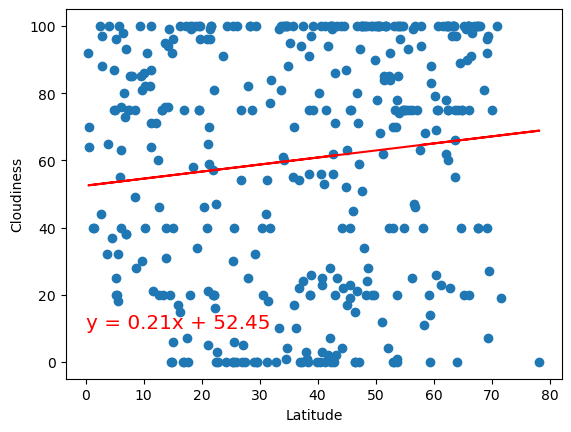

In [40]:
# Northern Hemisphere
lineregress(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])
slope, intercept, rvalue, p_value, std_err =linregress(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])
slope = '{0:,.2f}'.format(slope)
intercept = '{0:,.2f}'.format(intercept)

plt.text(0,10, s=f"y = {slope}x + {intercept}", c='r', size='x-large')
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.savefig("output_data/north_cloudiness.png")

The R-squared is: [rvalue]


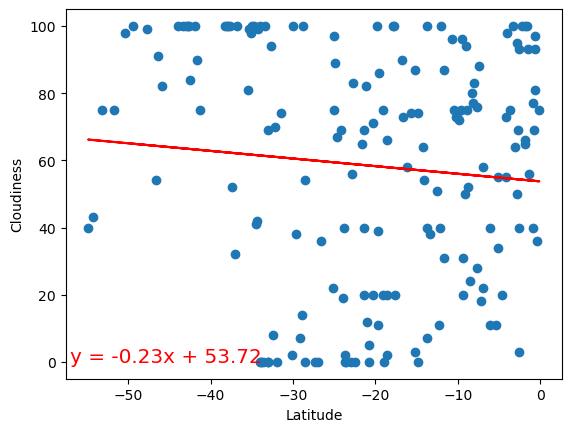

In [50]:
# Southern Hemisphere
lineregress(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])
slope, intercept, rvalue, p_value, std_err =linregress(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])
slope = '{0:,.2f}'.format(slope)
intercept = '{0:,.2f}'.format(intercept)

plt.text(-57,0, s=f"y = {slope}x + {intercept}", c='r', size='x-large')
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.savefig("output_data/south_cloudiness.png")

**Discussion about the linear relationship:** In the Northern Hemisphere, the linear model does not fully  capture the correlation between latitude and cloudiness. Furthermore, the spread of data points and the concentration at the extremes imply that the variability in cloudiness is higher at certain latitudes (perhaps near the poles and the Equator) and lower at mid-latitudes. This might be due to different climatic zones experiencing different cloud formation patterns. Moreover, The concentration at the top and bottom might indicate the presence of clusters or outliers in the data. These clusters could be regions where cloudiness is consistently high or low, potentially due to specific climatic conditions or geographical features influencing cloud formation.
In the Southern Hemisphere, the correlation between cloudiness and latitude is negative. There is a decrease in cloudiness with increasing latitude, the data points indicate significant variability and higher-than-predicted cloudiness, particularly closer to the Equator. 

### Wind Speed vs. Latitude Linear Regression Plot

The R-squared is: [rvalue]


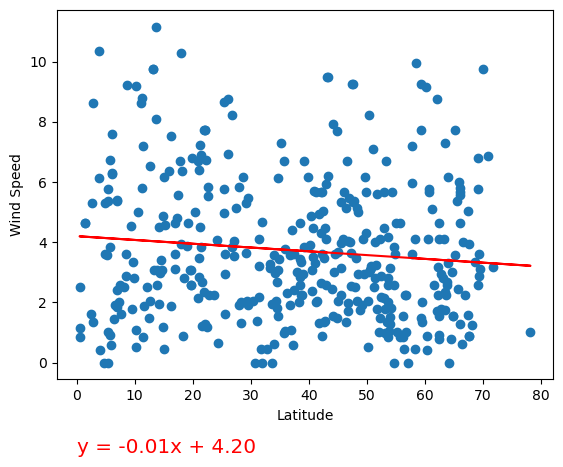

In [51]:
# Northern Hemisphere
lineregress(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])
slope, intercept, rvalue, p_value, std_err =linregress(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])
slope = '{0:,.2f}'.format(slope)
intercept = '{0:,.2f}'.format(intercept)

plt.text(0,-3, s=f"y = {slope}x + {intercept}", c='r', size='x-large')
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.savefig("output_data/north_wind_speed.png")

The R-squared is: [rvalue]


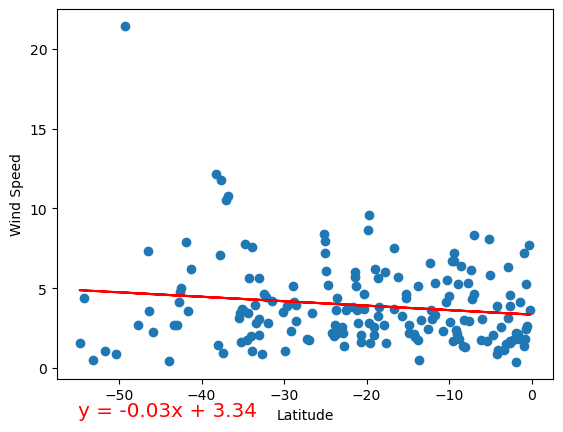

In [52]:
# Southern Hemisphere
lineregress(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])
slope, intercept, rvalue, p_value, std_err =linregress(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])
slope = '{0:,.2f}'.format(slope)
intercept = '{0:,.2f}'.format(intercept)

plt.text(-55,-3, s=f"y = {slope}x + {intercept}", c='r', size='x-large')
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.savefig("output_data/south_wind_speed.png")

**Discussion about the linear relationship:** In the Northern Hemisphere, there is a slight negative correlation between the wind speed and latitude. The variability in the data indicates that latitude is not a strong determinant of wind speed, and other geographical or environmental factors are likely playing a more significant role. 
In the Southern Hemisphere, the wind speed decreased with increasing latitude but the effect is minimal. The inverse relationship between latitude and wind speed, with most locations experiencing relatively lower wind speeds and some exceptions with higher wind speeds, likely influenced by local geographical factors.